In [2]:
library(dplyr)   
library(caret)
library(tidyverse)
library(recipes)
library(pROC)
library(caTools)


options(repr.plot.width = 20, repr.plot.height =10, repr.plot.res = 100)


load(file = "C:/Users/abonini/Desktop/Analysis/Sources/LIVERTRANSPLANT/Modello/df.Rdata")

## Data partition

In [3]:
#make this example reproducible
set.seed(1)

#use 70% of dataset as training set and 30% as test set
sample <- sample.split(df$deg_cat, SplitRatio = 0.7)
train  <- subset(df, sample == TRUE)
test   <- subset(df, sample == FALSE)


TrainClasses <- train$deg_cat
TrainData <- subset(train,select= -deg_cat)
TestClasses <- test$deg_cat
TestData <- subset(test,select= -deg_cat)

## Models

In [30]:
ctrl <- trainControl(method = "repeatedcv", 
                 number = 10, 
                 savePredictions = "final",classProbs=TRUE,verboseIter=TRUE, search= "random") 

#summaryFunction = multiClassSummary (to keep all metrics)

In [31]:
model_rf <- train(x=TrainData, y=TrainClasses, 
               method = "ranger",
               trControl = ctrl) 

+ Fold01.Rep1: min.node.size=11, mtry=60, splitrule=extratrees 
- Fold01.Rep1: min.node.size=11, mtry=60, splitrule=extratrees 
+ Fold01.Rep1: min.node.size= 3, mtry=11, splitrule=gini 
- Fold01.Rep1: min.node.size= 3, mtry=11, splitrule=gini 
+ Fold01.Rep1: min.node.size=14, mtry=71, splitrule=extratrees 
- Fold01.Rep1: min.node.size=14, mtry=71, splitrule=extratrees 
+ Fold02.Rep1: min.node.size=11, mtry=60, splitrule=extratrees 
- Fold02.Rep1: min.node.size=11, mtry=60, splitrule=extratrees 
+ Fold02.Rep1: min.node.size= 3, mtry=11, splitrule=gini 
- Fold02.Rep1: min.node.size= 3, mtry=11, splitrule=gini 
+ Fold02.Rep1: min.node.size=14, mtry=71, splitrule=extratrees 
- Fold02.Rep1: min.node.size=14, mtry=71, splitrule=extratrees 
+ Fold03.Rep1: min.node.size=11, mtry=60, splitrule=extratrees 
- Fold03.Rep1: min.node.size=11, mtry=60, splitrule=extratrees 
+ Fold03.Rep1: min.node.size= 3, mtry=11, splitrule=gini 
- Fold03.Rep1: min.node.size= 3, mtry=11, splitrule=gini 
+ Fold03.Rep

In [32]:
model_rrf <- train(x=TrainData, y=TrainClasses, 
               method = "RRF",
               trControl = ctrl) 

+ Fold01.Rep1: mtry=42, coefReg=0.8699, coefImp=0.8284 
- Fold01.Rep1: mtry=42, coefReg=0.8699, coefImp=0.8284 
+ Fold01.Rep1: mtry=37, coefReg=0.2238, coefImp=0.9399 
- Fold01.Rep1: mtry=37, coefReg=0.2238, coefImp=0.9399 
+ Fold01.Rep1: mtry=46, coefReg=0.0703, coefImp=0.9784 
- Fold01.Rep1: mtry=46, coefReg=0.0703, coefImp=0.9784 
+ Fold02.Rep1: mtry=42, coefReg=0.8699, coefImp=0.8284 
- Fold02.Rep1: mtry=42, coefReg=0.8699, coefImp=0.8284 
+ Fold02.Rep1: mtry=37, coefReg=0.2238, coefImp=0.9399 
- Fold02.Rep1: mtry=37, coefReg=0.2238, coefImp=0.9399 
+ Fold02.Rep1: mtry=46, coefReg=0.0703, coefImp=0.9784 
- Fold02.Rep1: mtry=46, coefReg=0.0703, coefImp=0.9784 
+ Fold03.Rep1: mtry=42, coefReg=0.8699, coefImp=0.8284 
- Fold03.Rep1: mtry=42, coefReg=0.8699, coefImp=0.8284 
+ Fold03.Rep1: mtry=37, coefReg=0.2238, coefImp=0.9399 
- Fold03.Rep1: mtry=37, coefReg=0.2238, coefImp=0.9399 
+ Fold03.Rep1: mtry=46, coefReg=0.0703, coefImp=0.9784 
- Fold03.Rep1: mtry=46, coefReg=0.0703, coefImp=

## Results

Random Forest 

747 samples
 77 predictor
  3 classes: 'Accettabile', 'Complicato', 'Ottimo' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 673, 673, 672, 673, 672, 672, ... 
Resampling results across tuning parameters:

  min.node.size  mtry  splitrule   Accuracy   Kappa    
   3             11    gini        0.5846534  0.2612755
  11             60    extratrees  0.5928506  0.2864190
  14             71    extratrees  0.5955714  0.2970509

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 71, splitrule = extratrees
 and min.node.size = 14.


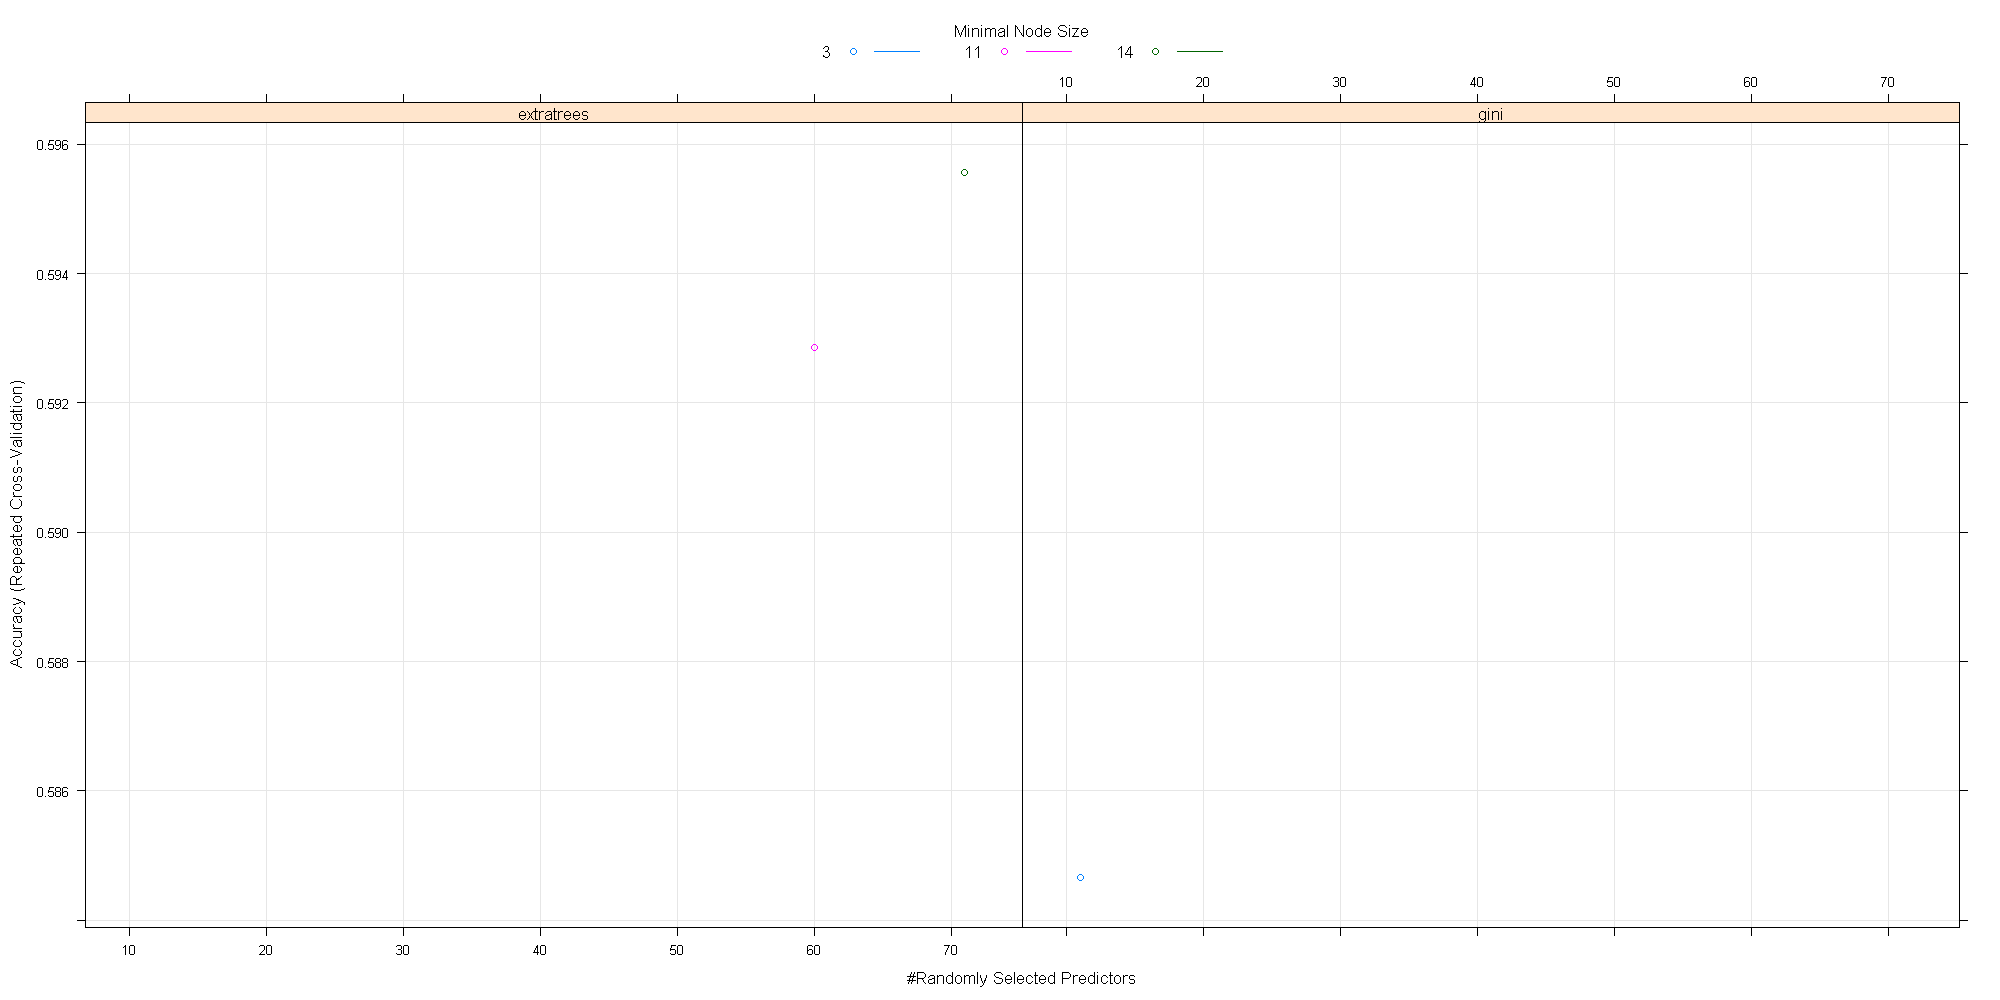

In [33]:
print(model_rf)
plot(model_rf)

Regularized Random Forest 

747 samples
 77 predictor
  3 classes: 'Accettabile', 'Complicato', 'Ottimo' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 672, 673, 673, 671, 672, 673, ... 
Resampling results across tuning parameters:

  mtry  coefReg     coefImp    Accuracy   Kappa    
  37    0.22380597  0.9398914  0.5217179  0.1898024
  42    0.86987250  0.8284372  0.5139640  0.1742872
  46    0.07029922  0.9783781  0.5286880  0.2037552

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 46, coefReg = 0.07029922
 and coefImp = 0.9783781.


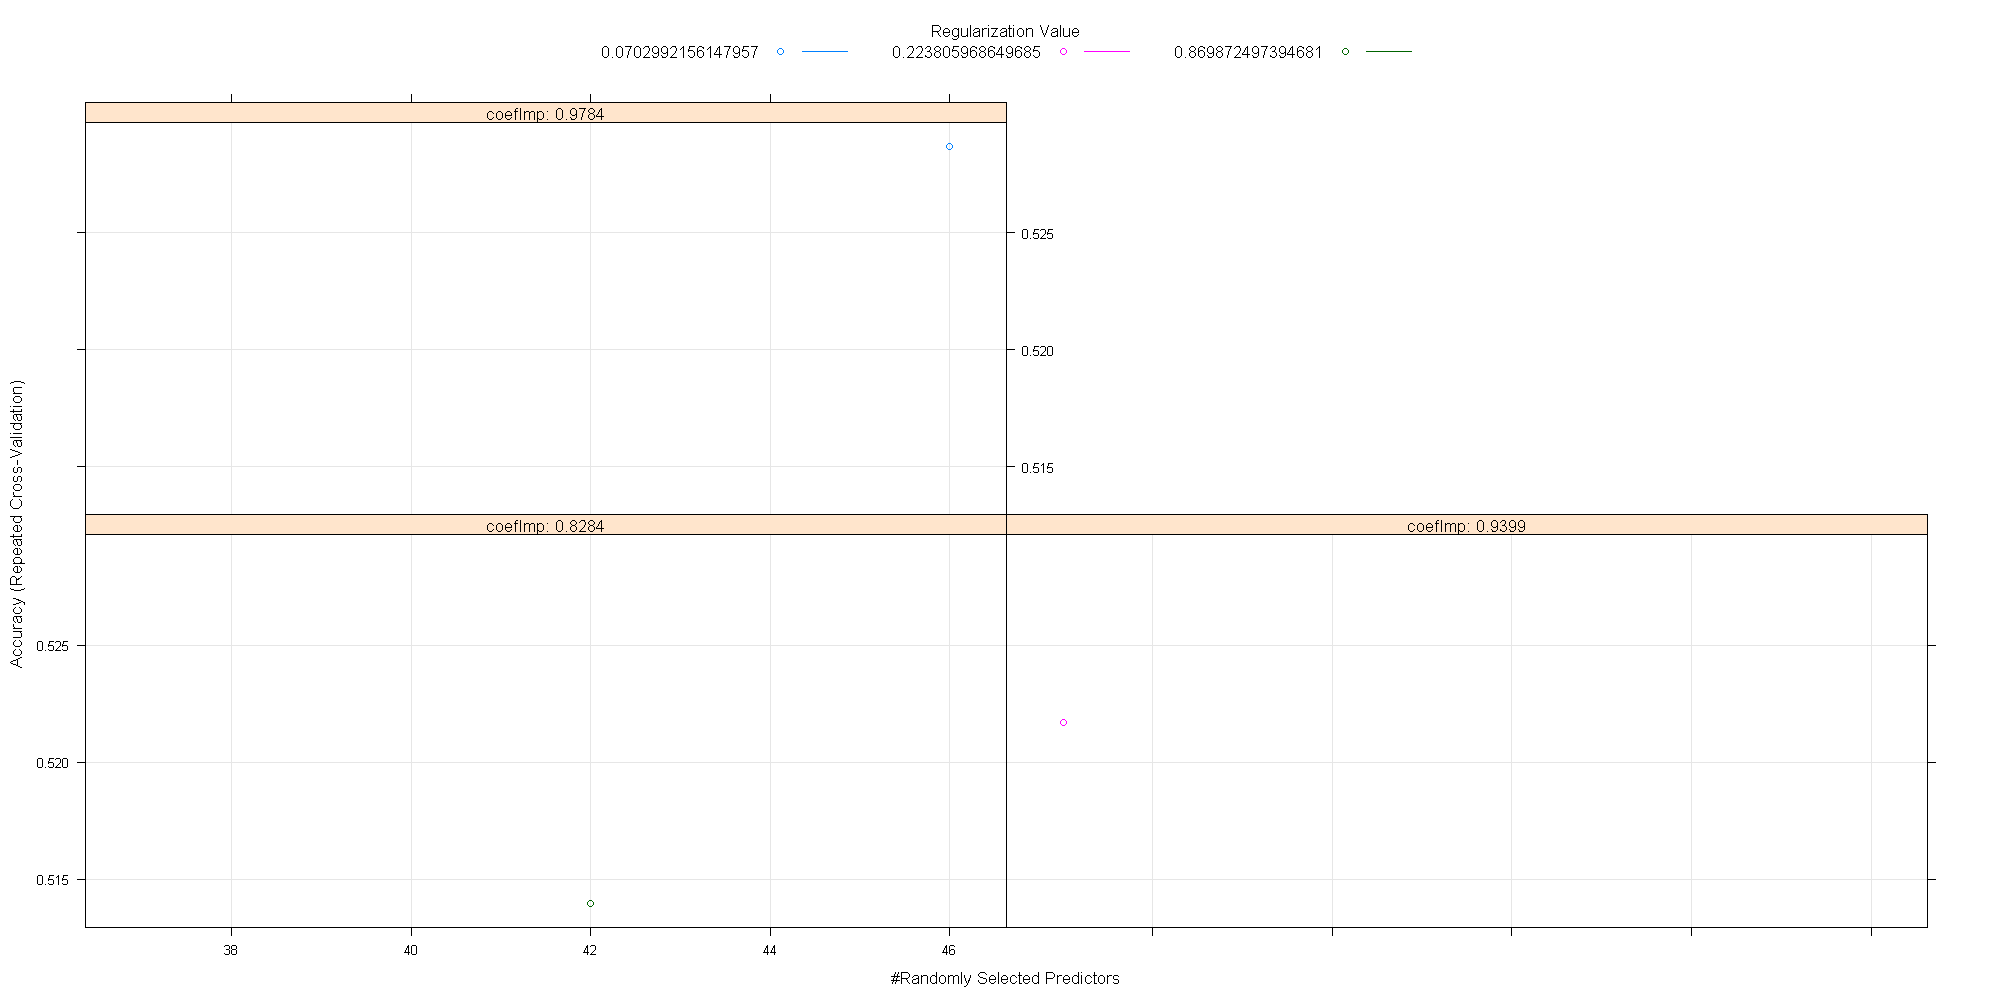

In [34]:
print(model_rrf)
plot(model_rrf)


Call:
summary.resamples(object = results)

Models: rf, rrf 
Number of resamples: 10 

Accuracy 
         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
rf  0.5270270 0.5555405 0.5866667 0.5955714 0.6213158 0.7066667    0
rrf 0.4864865 0.4966667 0.5133357 0.5286880 0.5693457 0.5866667    0

Kappa 
         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
rf  0.1714651 0.2179577 0.2797398 0.2970509 0.3516478 0.4972578    0
rrf 0.1363636 0.1544171 0.1685981 0.2037552 0.2602955 0.3209696    0


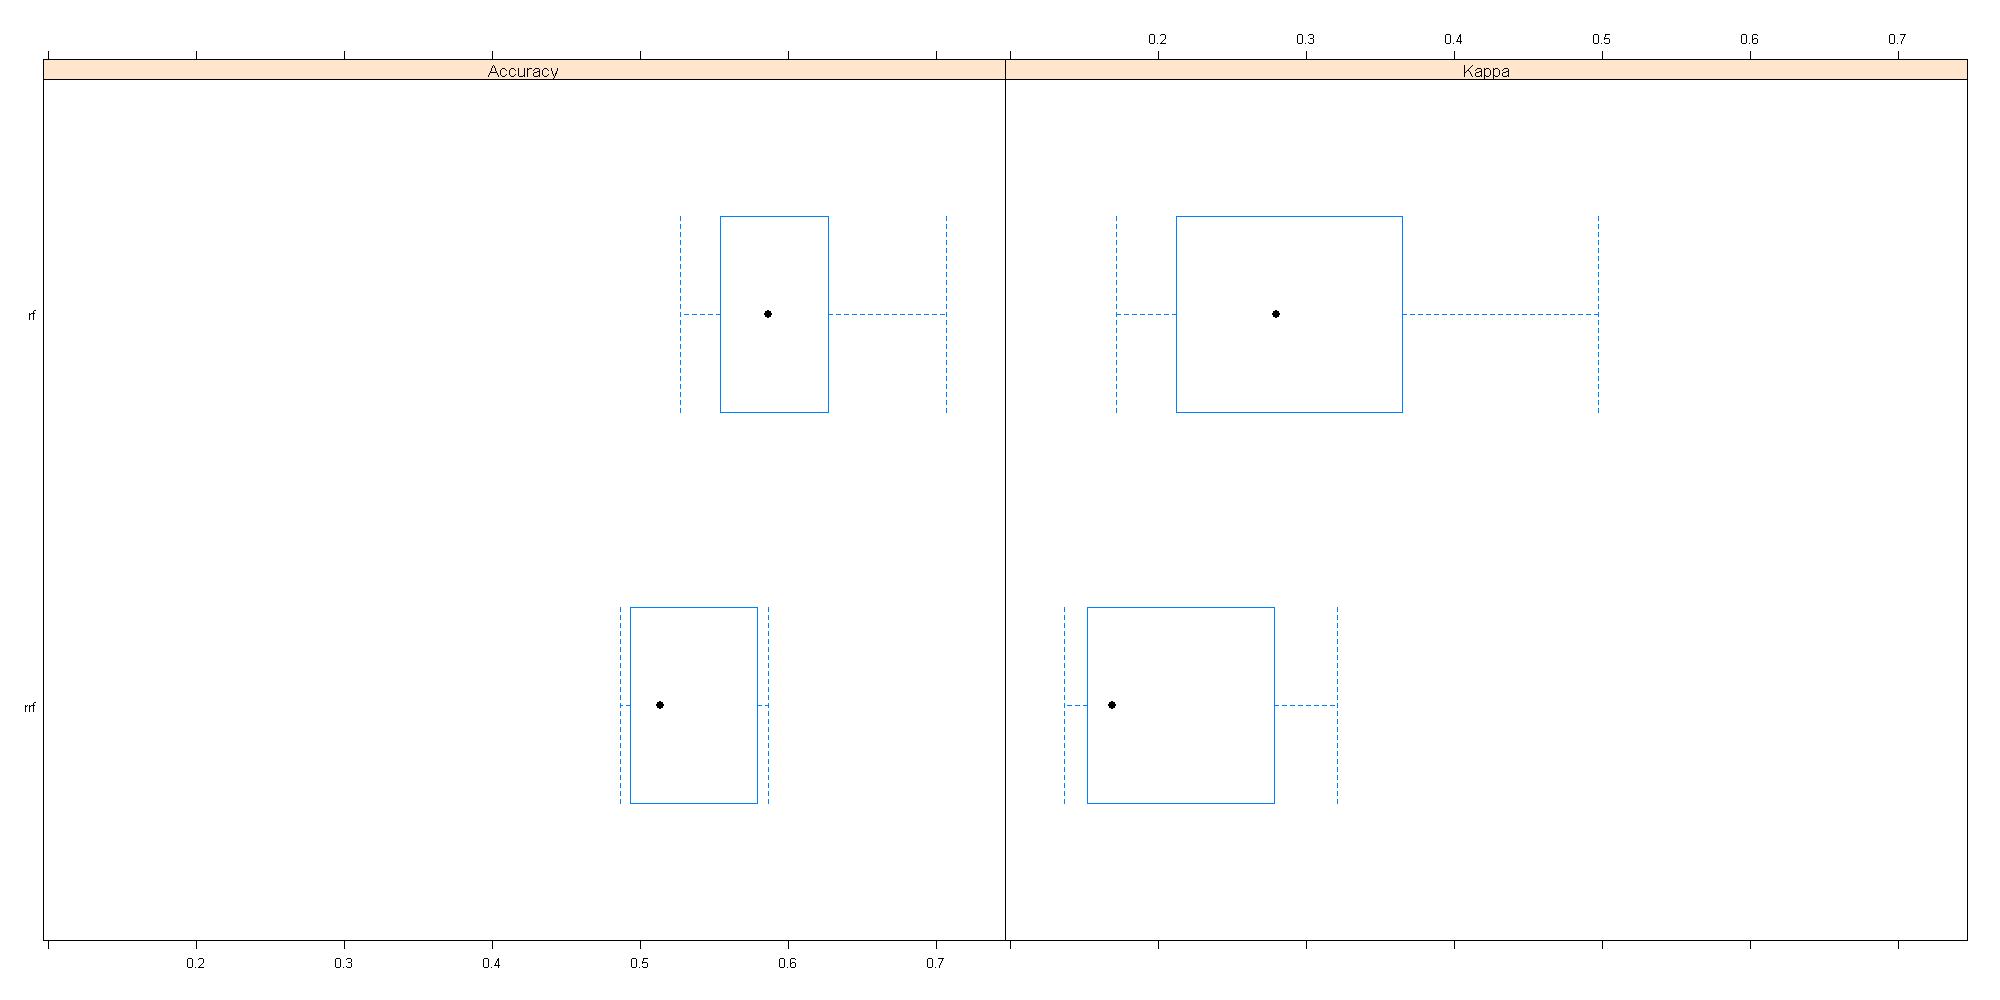

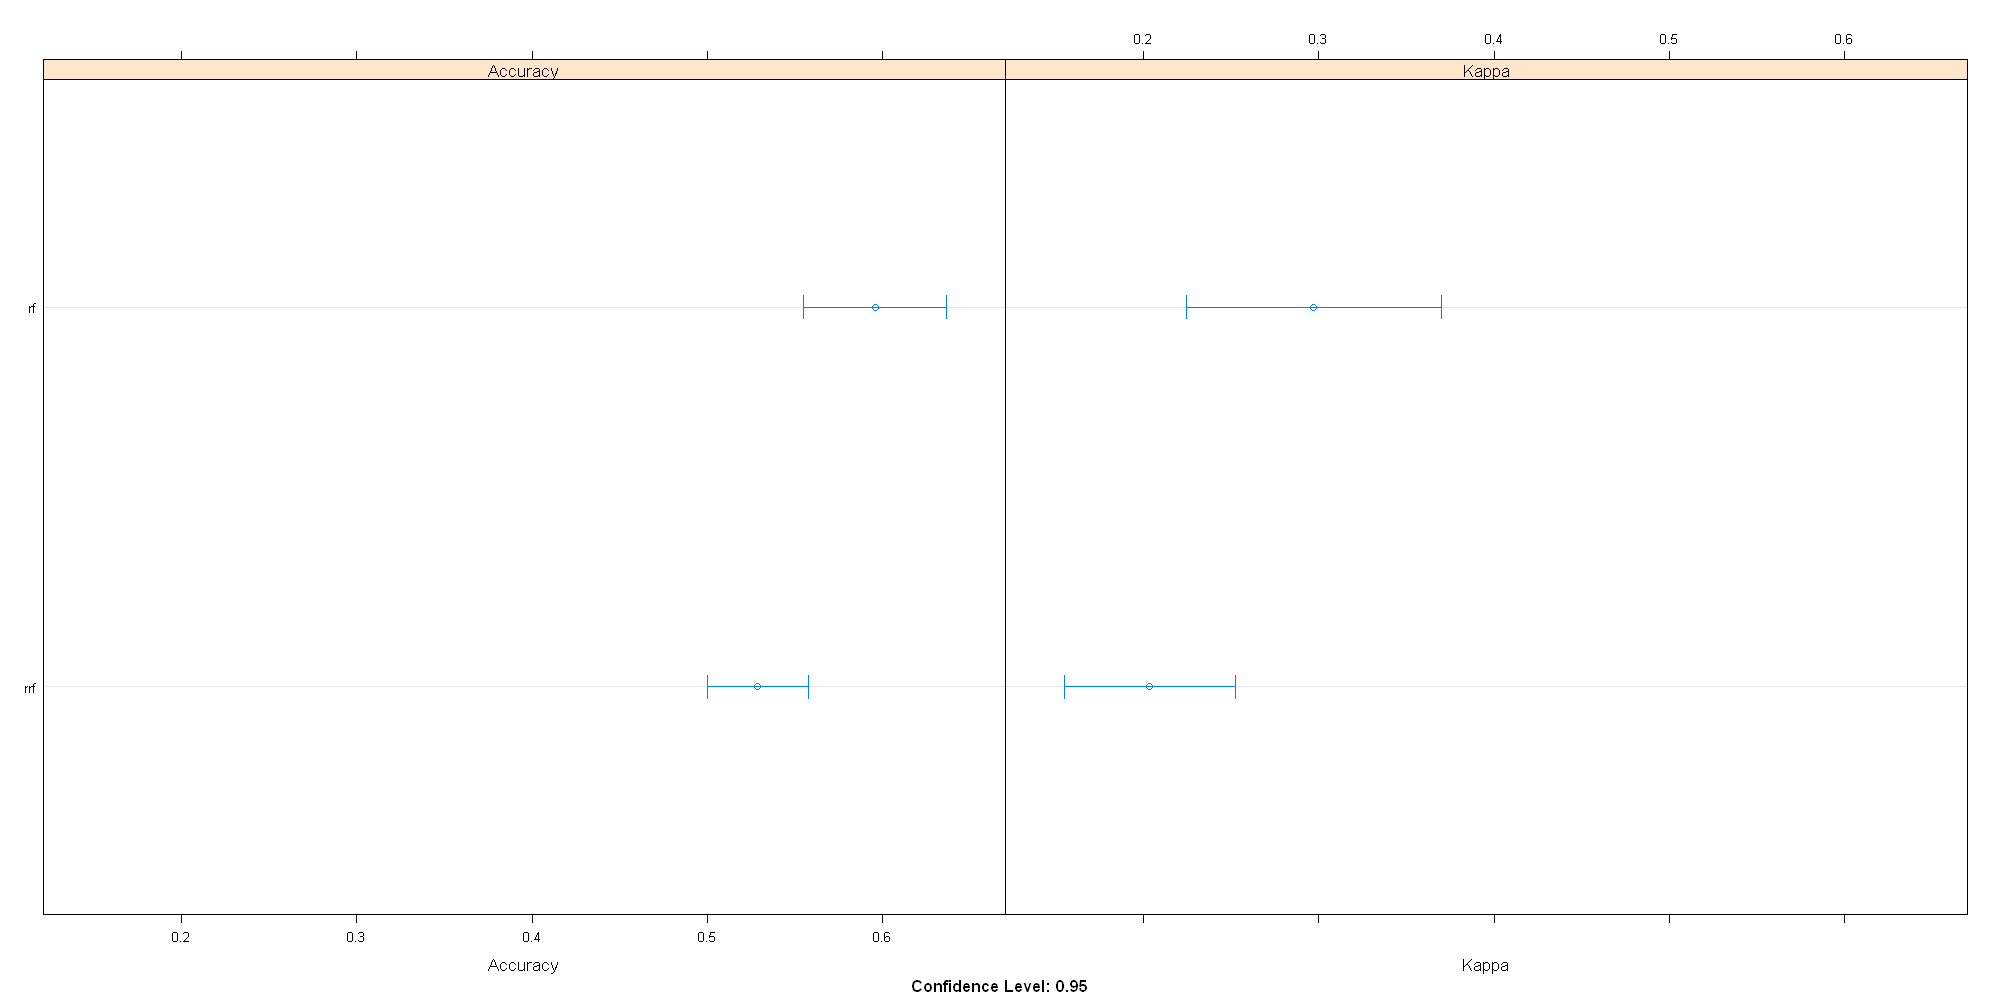

In [35]:
# collect resamples
results <- resamples(list(rf=model_rf,rrf=model_rrf))
# summarize the distributions
summary(results)
# boxplots of results
bwplot(results)
# dot plots of results
dotplot(results)

## Prediction

In [36]:
pred_rf <- predict(model_rf,TestData)  # 53 acc
pred_rf.prob <- predict(model_rf,TestData, type="prob")


result <- confusionMatrix(TestClasses,  pred_rf) 
result
result$byClass

Confusion Matrix and Statistics

             Reference
Prediction    Accettabile Complicato Ottimo
  Accettabile         107         36     13
  Complicato           51         68      3
  Ottimo               33          3      7

Overall Statistics
                                          
               Accuracy : 0.567           
                 95% CI : (0.5108, 0.6219)
    No Information Rate : 0.595           
    P-Value [Acc > NIR] : 0.8598          
                                          
                  Kappa : 0.2463          
                                          
 Mcnemar's Test P-Value : 0.0103          

Statistics by Class:

                     Class: Accettabile Class: Complicato Class: Ottimo
Sensitivity                      0.5602            0.6355       0.30435
Specificity                      0.6231            0.7477       0.87919
Pos Pred Value                   0.6859            0.5574       0.16279
Neg Pred Value                   0.4909           

,Sensitivity,Specificity,Pos Pred Value,Neg Pred Value,Precision,Recall,F1,Prevalence,Detection Rate,Detection Prevalence,Balanced Accuracy
Class: Accettabile,0.5602094,0.6230769,0.6858974,0.4909091,0.6858974,0.5602094,0.6167147,0.59501558,0.33333333,0.4859813,0.5916432
Class: Complicato,0.6355140,0.7476636,0.5573770,0.8040201,0.5573770,0.6355140,0.5938865,0.33333333,0.21183801,0.3800623,0.6915888
Class: Ottimo,0.3043478,0.8791946,0.1627907,0.9424460,0.1627907,0.3043478,0.2121212,0.07165109,0.02180685,0.1339564,0.5917712


In [37]:
roc_model_rf <- multiclass.roc(TestClasses, as.numeric(pred_rf))
roc_model_rf


Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls > cases




Call:
multiclass.roc.default(response = TestClasses, predictor = as.numeric(pred_rf))

Data: as.numeric(pred_rf) with 3 levels of TestClasses: Accettabile, Complicato, Ottimo.
Multi-class area under the curve: 0.5729

In [38]:
pred_rf.prob

Accettabile,Complicato,Ottimo
0.3404356,0.34714813,0.31241623
0.3852422,0.57157495,0.04318284
0.7440965,0.19963485,0.05626864
0.6742011,0.28826765,0.03753121
0.4774880,0.48401634,0.03849565
0.4881476,0.42526397,0.08658841
0.4590443,0.07867424,0.46228142
0.5146177,0.17294186,0.31244039
0.4583972,0.08922169,0.45238110
0.2442918,0.73136388,0.02434434
